<a href="https://colab.research.google.com/github/Zulfa-Varvani/ML-things/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import SGD

In [10]:
#loading dataset and one hot encode target values
def load_ds():
  (train_x, train_y), (test_x,test_y) = cifar10.load_data()
  train_y = to_categorical(train_y)
  test_y = to_categorical(test_y)
  return train_x,train_y,test_x,test_y

In [11]:
#scale pixels
def pixels_prep(train,test):
  train_n = train.astype('float32') #integers to floats
  test_n = test.astype('float32')
  train_n /= 255.0 #normalize range 0-1
  test_n /= 255.0
  return train_n, test_n

In [16]:
#cnn model
def model_def():
  model = Sequential()
  model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer = 'he_uniform', padding='same', input_shape=(32,32,3)))
  model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer = 'he_uniform', padding='same'))
  model.add(MaxPooling2D((2,2)))
  model.add(Flatten())
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(10,activation='softmax'))

  opt = SGD(learning_rate=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [13]:
#plot for learning curves
def diagnostics(history):
  plt.subplot(211)
  plt.title('Cross Entropy Loss')
  plt.plot(history.history['loss'], color='blue',label='train')
  plt.plot(history.history['val_loss'], color='orange', label='test')
  plt.subplot(212)
  plt.title('Classification Accuracy')
  plt.plot(history.history['accuracy'], color='blue',label='train')
  plt.plot(history.history['val_accuracy'], color='orange', label='test')

66.72999858856201%


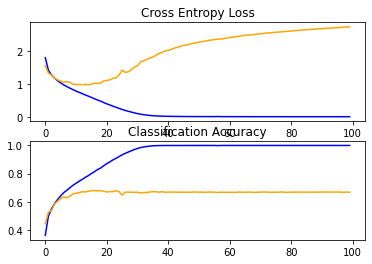

In [17]:
#evaluating a model
def run_test():
  train_x, train_y, test_x, test_y = load_ds()
  train_x, test_x = pixels_prep(train_x,test_x)
  model = model_def()
  history = model.fit(train_x, train_y, epochs=100, batch_size=64, validation_data=(test_x,test_y), verbose=0)
  _,acc = model.evaluate(test_x, test_y, verbose=0)
  print(f'{acc*100}%')
  diagnostics(history)
run_test()